<a href="https://colab.research.google.com/github/jbell1991/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












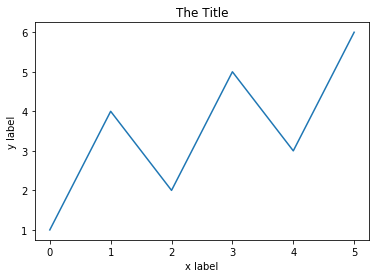

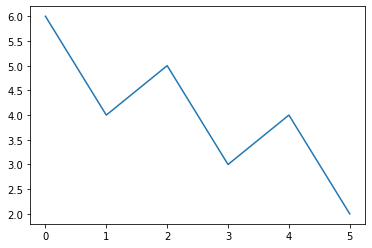

In [6]:
# Your Work Here
# Replicating the lesson code

import matplotlib.pyplot as plt

sample_data = [1,4,2,5,3,6]
plt.plot(sample_data)
plt.title('The Title')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

more_data = [6,4,5,3,4,2]
plt.plot(more_data)
plt.show()

In [8]:
from IPython.display import display, Image

url =  'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'

example = Image(url=url, width=400)

display(example)

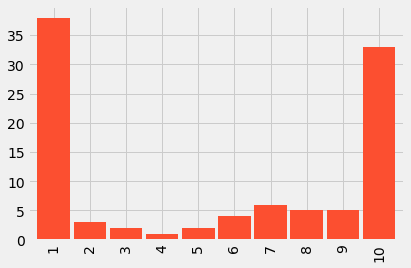

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9)
plt.show()

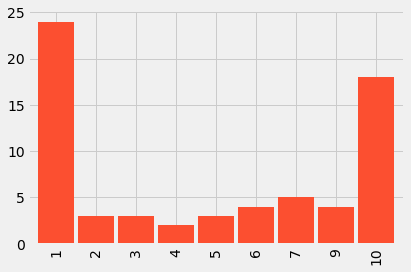

In [17]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2,
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9)

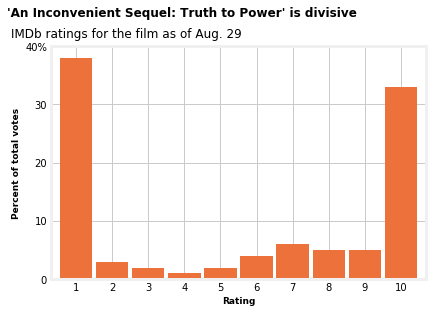

In [41]:
# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
fake.plot.bar(width=0.9, color='#ED713A')

# Sets axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, fontweight='bold', x=.35, y=1.1)

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=41.5, x=-1.8, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0','10', '20', '30', '40%'], fontsize=10)
ax.set_yticks(range(0, 50, 10))

# Set x axis lables, tick marks and grind lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10)

# Show the plot and squelch the funny output
fig.show()

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [43]:
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [44]:
df.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.set_index('timestamp', inplace=True)

In [0]:
lastday = df['2017-08-29']

In [48]:
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [49]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [50]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [51]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


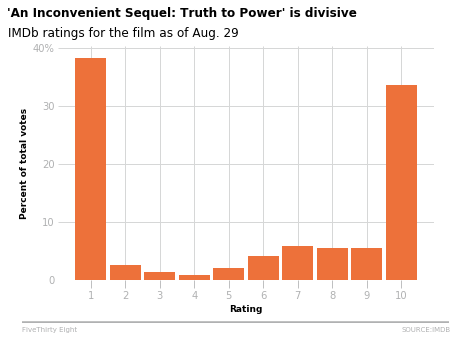

In [168]:
# Set stylesheet
plt.style.use('fivethirtyeight')

# figure axes syntax
fig, ax = plt.subplots()

# Make the figure background color white
fig.patch.set(facecolor='white')

# put bars on the axes
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color='#ED713A')

# Sets axes background color
ax.set(facecolor='white')

# Set plot title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, fontweight='bold', x=.33, y=1.1)

# Set plot ylabel
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold')

# Set plot xlabel
ax.set_xlabel('Rating', fontsize=9, fontweight='bold')

# Set subtitle
ax.text(s='IMDb ratings for the film as of Aug. 29', y=42, x=-1.4, fontsize=12)

# set y axis labels, tick marks and grid lines
ax.set_yticklabels(['0','10', '20', '30', '40%'], fontsize=10, color='#B0B1B2')
ax.set_yticks(range(0, 50, 10))

# Set x axis lables, tick marks and grind lines
ax.set_xticklabels(range(1,11,1), rotation='horizontal', fontsize=10, color='#B0B1B2')
ax.set_xticks(range(1,11))

# Set grid color
ax.grid(color='#D6D7D7')

# Create footer
ax.text(s='_____________________________________________________________', y=-7, x=-1, fontweight='bold', color='#B0B1B2')
ax.text(s='FiveThirty Eight', y=-9, x=-1, fontsize=7, color='#B0B1B2')
ax.text(s='SOURCE:IMDB', y=-9, x=10, fontsize=7, color='#B0B1B2')

# Removing spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adding ticks on bottom of x-axis
ax.tick_params('x', direction='out', length=8, color='#B0B1B2')

# Show the plot and squelch the funny output
fig.show()

In [129]:
display(example)

In [226]:
# Reproducing another example from FiveThirtyEight

from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/11/chalabi-flowers-feature-commonname-2.png?w=575' 
example2 = Image(url=url, width=400)

display(example2)

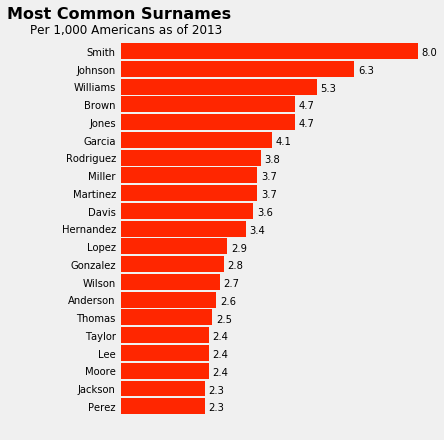

In [277]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

# Duplicate dataset 
popular_surnames = ('Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Rodriguez',
                    'Miller', 'Martinez', 'Davis', 'Hernandez', 'Lopez', 'Gonzalez', 'Wilson',
                    'Anderson', 'Thomas', 'Taylor', 'Lee', 'Moore', 'Jackson', 'Perez')
per_thousand = (8.0, 6.3, 5.3, 4.7, 4.7, 4.1, 3.8, 3.7, 3.7, 3.6, 3.4, 
                2.9, 2.8, 2.7, 2.6, 2.5, 2.4, 2.4, 2.4, 2.3, 2.3)

# Change figure background color
fig.patch.set(facecolor='#F0F0F0')

# Make figure larger
fig.set_size_inches(5, 7)

# Set axes background color 
ax.set(facecolor='#F0F0F0')

# Put bars on axes in red
ax.barh(popular_surnames, per_thousand, height=.9, color='#FF2600')

# Set y labels to popular surnames
ax.set_yticklabels(popular_surnames, fontsize=10)

# Inverted y axis since data was in reverse order when plotted 
ax.invert_yaxis()

# Set plot title 
ax.set_title('Most Common Surnames', fontsize=16, fontweight='bold', x=0)

# Set plot subtitle
ax.text(s='Per 1,000 Americans as of 2013', y=-1, x=-2.4, fontsize=12)

# Delete x axis tick marks
ax.set_xticks([])

# Delete grid
ax.grid(b=None)

# Put x value at the end of each bar
for i, bar in enumerate(per_thousand):
  ax.text(bar + .1, i + .25, str(bar), fontsize=10)

plt.show()


In [278]:
display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here